# About the Problem Statement

We have access to the Indian Census data for the year 2011, but the data collected has so many variables making it difficult to find useful details without using Data Science Techniques. 

In this project, first Detailed Explanatory Aanalysis (EDA) to draw meaningful conclusions with the help data visualisation techniques is performed. The code for this part can be found in the file named- "EDA_IndianCensus.ipynb"

Next, Principal Component Analysis is done on the given data by finding the components that show the most variance. This part is coded in the file- "PCA_IndianCensus.ipynb"

#### Project By- Shreya Gupta 
done on 16th October 2023

In [3]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from factor_analyzer import FactorAnalyzer

# To Read the data and perform basic Analysis 

In this part we will be focusing on understanding our dataset by performing the following operation:

* check the shape and size of dataset.
* check the info for datatypes of columns.
* check for null values
* check for duplicates

In [5]:
#reading data

df= pd.read_excel('PCA India Data_Census.xlsx')

In [4]:
df.head().T

,0,1,2,3,4
State Code,1,1,1,1,1
Dist.Code,1,2,3,4,5
State,Jammu & Kashmir,Jammu & Kashmir,Jammu & Kashmir,Jammu & Kashmir,Jammu & Kashmir
Area Name,Kupwara,Badgam,Leh(Ladakh),Kargil,Punch
No_HH,7707,6218,4452,1320,11654
...,...,...,...,...,...
MARG_HH_0_3_F,252,148,34,50,302
MARG_OT_0_3_M,32,76,0,4,24
MARG_OT_0_3_F,46,178,4,10,105
NON_WORK_M,258,140,67,116,180


In [5]:
df.shape

(640, 61)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [7]:
df.describe()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


## Observations 

* This census has 640 records and 61 variables.
* There are no missing (null) values in the data.
* Except for state and area name all the columns are of integer datatype.

# Detailed Explanatory Analysis 

### 1. How many districts does each state have?

In [10]:
df.groupby('State')['Area Name'].unique().reset_index()

,State,Area Name
0,Andaman & Nicobar Island,"[Nicobars, North & Middle Andaman, South Anda..."
1,Andhra Pradesh,"[Adilabad, Nizamabad, Karimnagar, Medak, Hyder..."
2,Arunachal Pradesh,"[Tawang, West Kameng, East Kameng, Papum Pare,..."
3,Assam,"[Kokrajhar, Dhubri, Goalpara, Barpeta, Morigao..."
4,Bihar,"[Pashchim Champaran, Purba Champaran, Sheohar,..."
5,Chandigarh,[Chandigarh]
6,Chhattisgarh,"[Koriya, Surguja, Jashpur , Raigarh, Korba , J..."
7,Dadara & Nagar Havelli,[Dadra & Nagar Haveli]
8,Daman & Diu,"[Diu, Daman]"
9,Goa,"[North Goa, South Goa]"


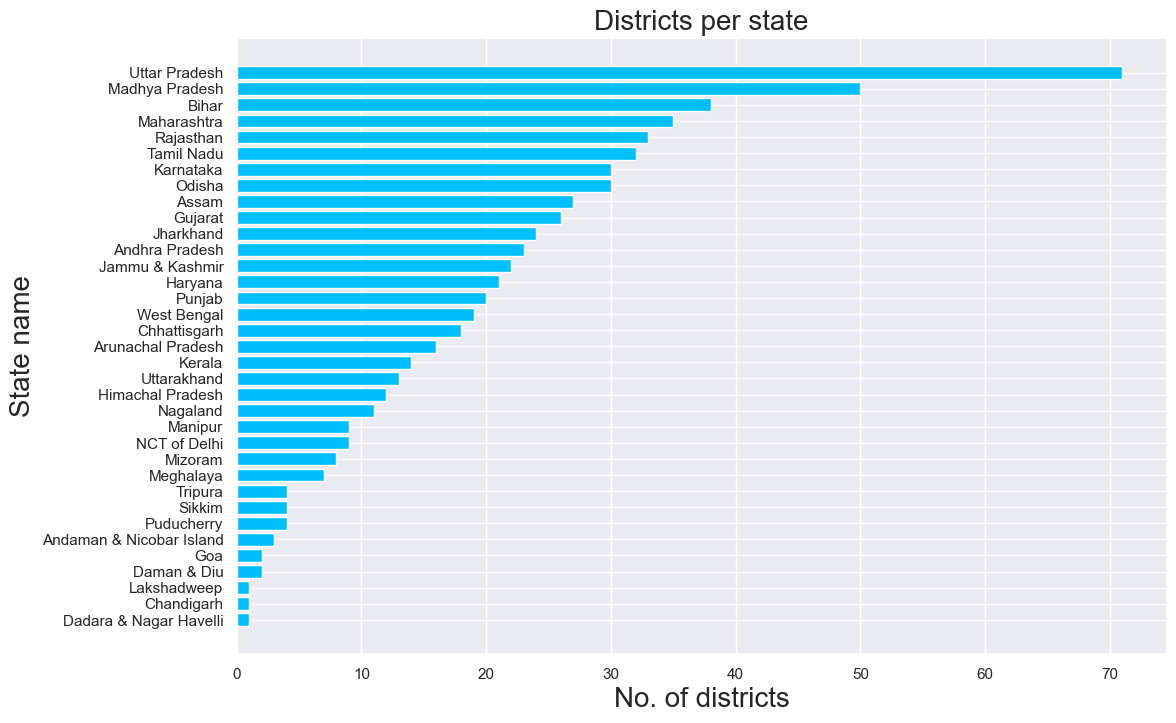

In [11]:
plt.figure(figsize=(12,8))
count =df['State'].value_counts()

sns.set(style="darkgrid")

plt.barh(count.index, count, color='deepskyblue')
plt.ylabel("State name",size=20)
plt.xlabel("No. of districts", size=20)
plt.title("Districts per state", size= 20)
plt.gca().invert_yaxis()

### 2. What is the Total population of India as well as male and female population distribution ?

In [12]:
total_Male_Population=df['TOT_M'].sum()
total_Female_Population =df['TOT_F'].sum()
print('Total Male population of Indian', total_Male_Population)
print('Total Female Population of India', total_Female_Population)

Total Male population of Indian 51161969
Total Female Population of India 78318134


In [13]:
print("Total Population of India", total_Female_Population+total_Male_Population)

Total Population of India 129480103


Text(0.5, 1.0, 'Pouplation Distribution In India')

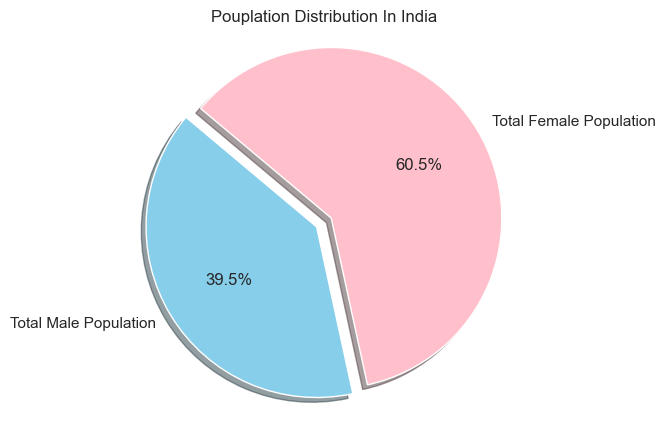

In [14]:
## Let's visualize this information.
labels = ['Total Male Population','Total Female Population']
sizes = [total_Male_Population ,total_Female_Population ]
colors = ['skyblue','pink']
explode = (0.1,0)

plt.figure(figsize=(5,5))
plt.pie(sizes,labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pouplation Distribution In India')

#### Insights:

* Total Population of India 12,94,80,103.
* The population of female is more than male.


### 3. State wise population of India

In [15]:
# Group the data by 'State' and sum the 'TOT_M' and 'TOT_F' columns for each state
state_population = df.groupby('State')[['TOT_M', 'TOT_F']].sum().reset_index()

# Calculate the total population for each state by adding male and female populations
state_population['Total Population'] = state_population['TOT_M'] + state_population['TOT_F']

# Display the state-wise population
print(state_population)


                       State    TOT_M     TOT_F  Total Population
0   Andaman & Nicobar Island    18726     28691             47417
1             Andhra Pradesh  3274363   6097235           9371598
2          Arunachal Pradesh    50582     88066            138648
3                      Assam  1437268   2093432           3530700
4                      Bihar  4025198   5405883           9431081
5                 Chandigarh    41753     59644            101397
6               Chhattisgarh   838404   1526592           2364996
7     Dadara & Nagar Havelli     6982     10831             17813
8                Daman & Diu    13153     18706             31859
9                        Goa   118979    191393            310372
10                   Gujarat  1983685   2939472           4923157
11                   Haryana  1167816   1498873           2666689
12          Himachal Pradesh   483381    752062           1235443
13           Jammu & Kashmir   421213    572959            994172
14        

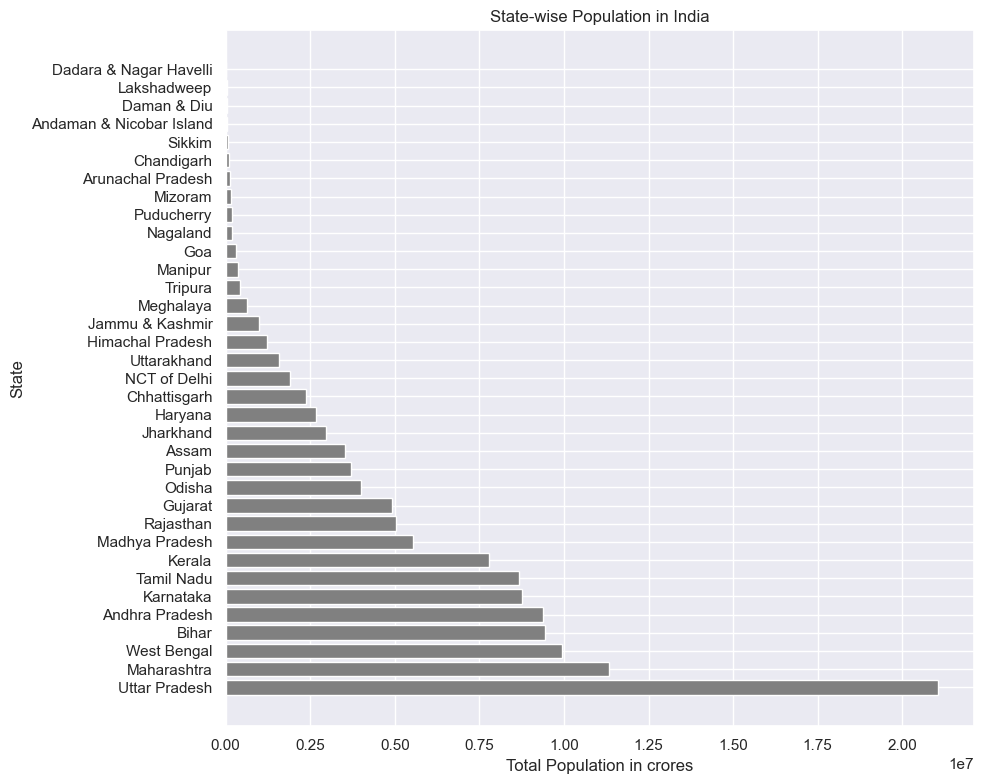

In [16]:
# Sort the data by total population in descending order
state_population = state_population.sort_values(by='Total Population', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(state_population['State'], state_population['Total Population'], color='grey')
plt.xlabel('Total Population in crores')
plt.ylabel('State')
plt.title('State-wise Population in India')
plt.tight_layout()

plt.show()


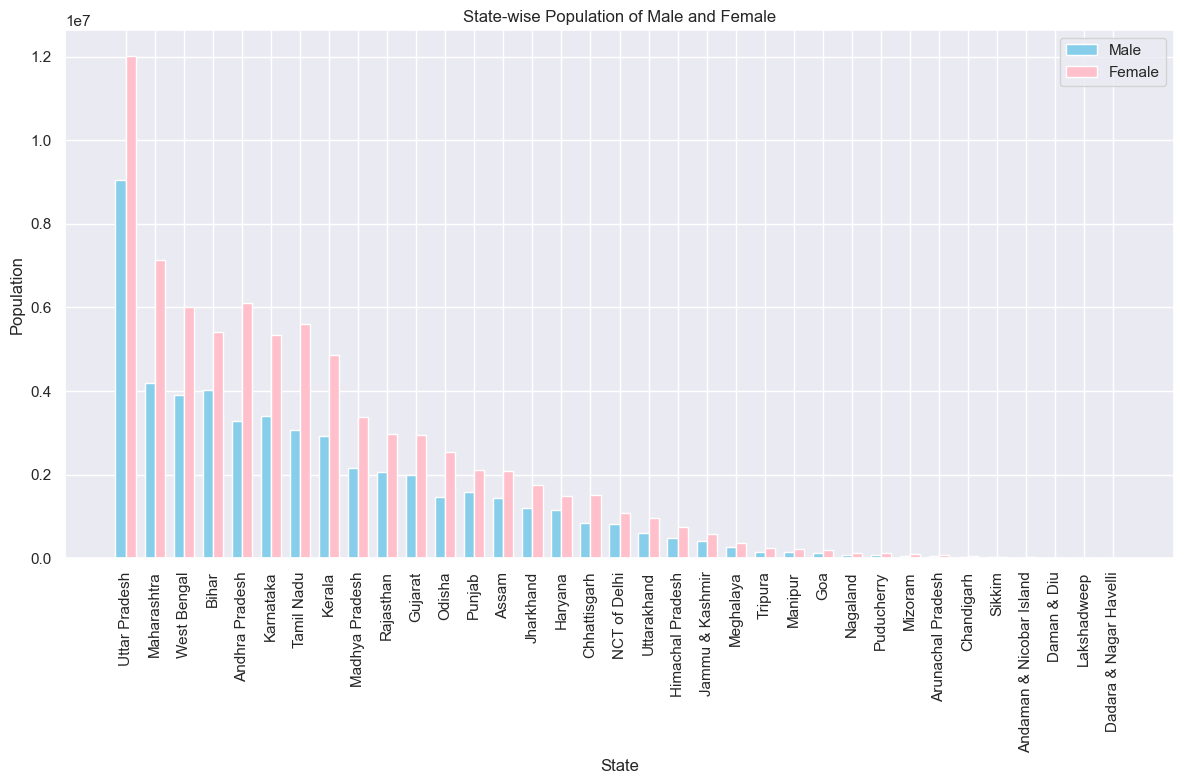

In [20]:
# Sort the data by total population in descending order
state_population = state_population.sort_values(by='Total Population', ascending=False)

# Extract state names and male/female populations
states = state_population['State']
male_population = state_population['TOT_M']
female_population = state_population['TOT_F']

# Define the bar width and positions
bar_width = 0.35
bar_positions = range(len(states))

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(bar_positions, male_population, width=bar_width, label='Male', color='skyblue', align='center')
plt.bar([pos + bar_width for pos in bar_positions], female_population, width=bar_width, label='Female', color='pink', align='center')

# Set x-axis labels and ticks
plt.xticks([pos + bar_width / 2 for pos in bar_positions], states, rotation=90)
plt.xlabel('State')
plt.ylabel('Population')
plt.title('State-wise Population of Male and Female')
plt.legend()

plt.tight_layout()
plt.show()


#### Insights:

* The most populated state is Uttar Pradesh, followed by Maharashtra then West Bengal.
* Dadra and Nagar Haveli has the lest population, which is 17,813

* The state with highest number of males & females is Uttar Pradesh, Followed by Maharashtra.
* 3rd highest state, having Most number of Male population is Bihar.
* 3rd highest state, having most number of female population is west Bengal.


### 4. Analysis Of Literacy 

In [21]:
# Group the data by 'State' and sum the 'M_LIT' and 'F_LIT' columns for each state
state_literate_population = df.groupby('State')[['M_LIT', 'F_LIT']].sum().reset_index()

# Calculate the total literate population for each state by adding male and female literate populations
state_literate_population['Total Literate Population'] = state_literate_population['M_LIT'] + state_literate_population['F_LIT']

# Display the state-wise literate population
print(state_literate_population)

                       State    M_LIT    F_LIT  Total Literate Population
0   Andaman & Nicobar Island    15488    20237                      35725
1             Andhra Pradesh  2372971  2678603                    5051574
2          Arunachal Pradesh    33965    45307                      79272
3                      Assam  1023294  1152979                    2176273
4                      Bihar  2408492  2197931                    4606423
5                 Chandigarh    33552    43438                      76990
6               Chhattisgarh   614878   703825                    1318703
7     Dadara & Nagar Havelli     5119     5308                      10427
8                Daman & Diu    10880    12520                      23400
9                        Goa    99381   139749                     239130
10                   Gujarat  1509399  1722877                    3232276
11                   Haryana   874982   826676                    1701658
12          Himachal Pradesh   387845 

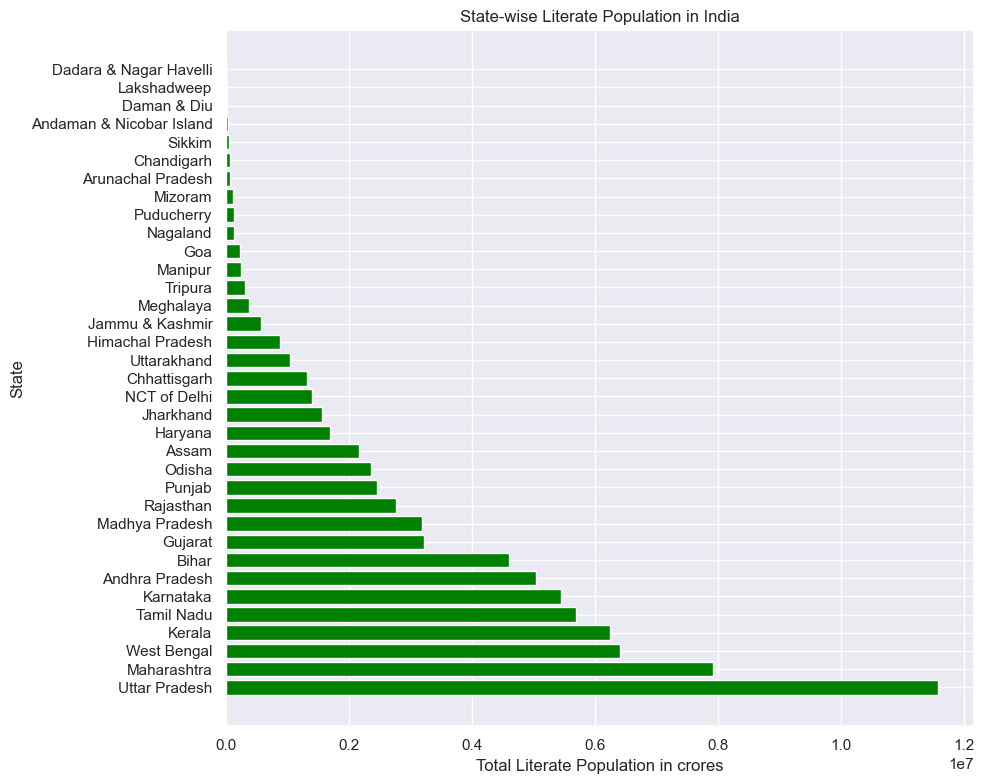

In [22]:
# Sort the data by total population in descending order
state_literate_population = state_literate_population.sort_values(by='Total Literate Population', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(state_literate_population['State'], state_literate_population['Total Literate Population'], color='green')
plt.xlabel('Total Literate Population in crores')
plt.ylabel('State')
plt.title('State-wise Literate Population in India')
plt.tight_layout()

plt.show()


In [25]:
pip install geopandas

C:\Users\Asus\AppData\Local\Temp\ipykernel_21048\507267313.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['State']).mean()['f_lit_r'].sort_values(ascending=False).plot(kind='bar',figsize=(12,7))


<Axes: title={'center': 'Female Literacy % State-wise'}, xlabel='State', ylabel='Female Literacy %'>

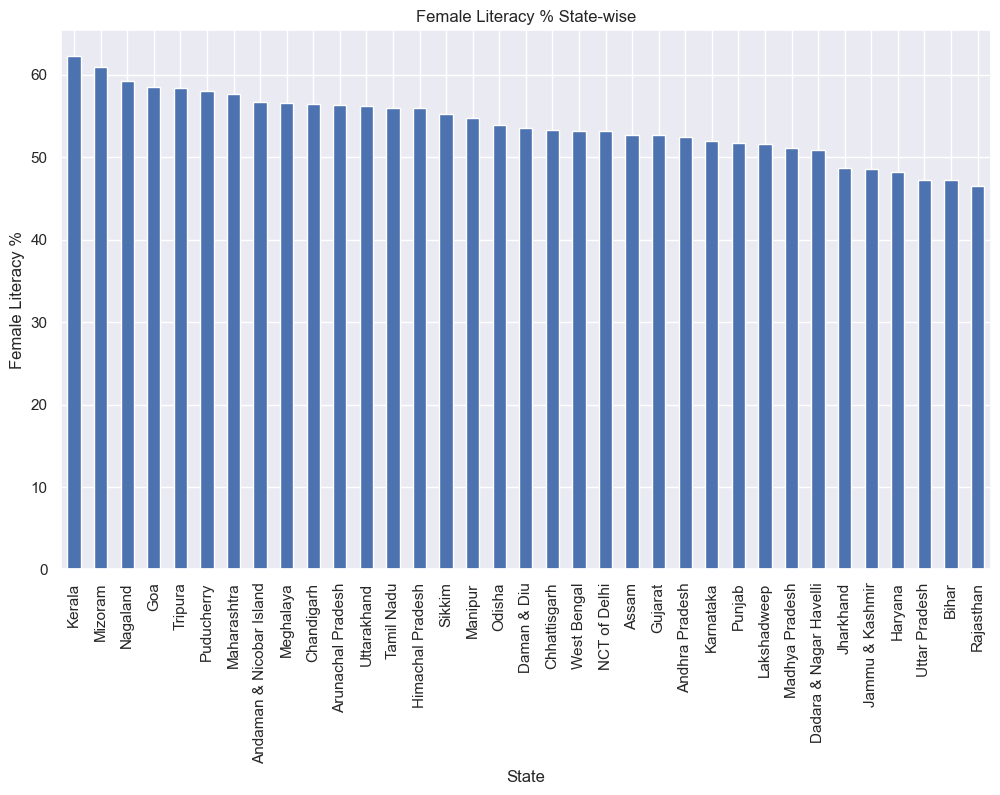

In [28]:
#female literacy

df['f_lit_r']= df['F_LIT']/(df['M_LIT']+df['F_LIT'])*100


plt.title('Female Literacy % State-wise')
plt.ylabel('Female Literacy %')
df.groupby(['State']).mean()['f_lit_r'].sort_values(ascending=False).plot(kind='bar',figsize=(12,7))

### 5. Out of Total Population, What were the population of scheduled castes


In [29]:
sc_males = df['M_SC'].sum()
sc_female = df['F_SC'].sum()
sc_total = sc_female + sc_males
print('Total Population of scheduled cast male was',sc_males)
print('Total Population of scheduled cast female was', sc_female)
print('Total Population of scheduled casts in india was',sc_total)

Total Population of scheduled cast male was 8845406
Total Population of scheduled cast female was 13298171
Total Population of scheduled casts in india was 22143577


In [32]:
total_population = total_Female_Population+total_Male_Population
total_population

129480103

Text(0.5, 1.0, 'Pouplation Distribution: Total scheduled Casts Vs Total Population')

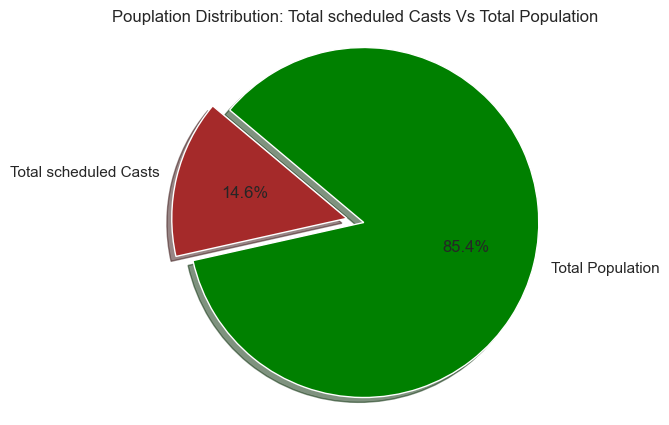

In [33]:
## Let's visualize this information.
labels = ['Total scheduled Casts','Total Population']
sizes = [sc_total ,total_population ]
colors = ['brown','green']
explode = (0.1,0)

plt.figure(figsize=(5,5))
plt.pie(sizes,labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pouplation Distribution: Total scheduled Casts Vs Total Population')

#### Insights:

* Out of total population 14.6% were scheduled casts.
* Total Population of scheduled cast male was 88,45,406
* Total Population of scheduled cast female was 1,32,98,171
* Total Population of scheduled casts in india was 2,21,43,577

In [35]:
# Group the data by 'State' and sum the 'M_SC' and 'F_SC' columns for each state
state_SC_population = df.groupby('State')[['M_SC', 'F_SC']].sum().reset_index()

# Calculate the total SC population for each state by adding male and female SC populations
state_SC_population['Total SC Population'] = state_SC_population['M_SC'] + state_SC_population['F_SC']

# Display the state-wise literate population
print(state_SC_population)

                       State     M_SC     F_SC  Total SC Population
0   Andaman & Nicobar Island        0        0                    0
1             Andhra Pradesh   611745  1123569              1735314
2          Arunachal Pradesh        0        0                    0
3                      Assam   112639   161376               274015
4                      Bihar   588112   793817              1381929
5                 Chandigarh     9499    12155                21654
6               Chhattisgarh   113125   212054               325179
7     Dadara & Nagar Havelli      158      247                  405
8                Daman & Diu      523      708                 1231
9                        Goa     2318     3539                 5857
10                   Gujarat   162106   230767               392873
11                   Haryana   238873   302303               541176
12          Himachal Pradesh   111490   166447               277937
13           Jammu & Kashmir    44423    60230  

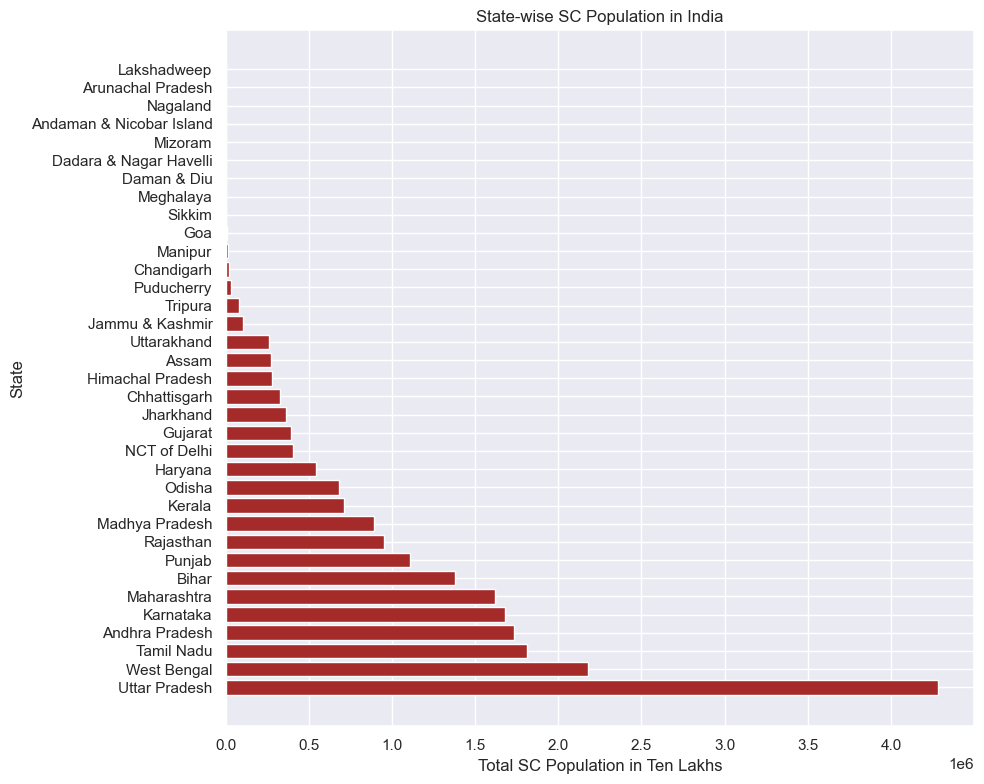

In [36]:
# Sort the data by total population in descending order
state_SC_population = state_SC_population.sort_values(by='Total SC Population', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(state_SC_population['State'], state_SC_population['Total SC Population'], color='brown')
plt.xlabel('Total SC Population in Ten Lakhs')
plt.ylabel('State')
plt.title('State-wise SC Population in India')
plt.tight_layout()

plt.show()


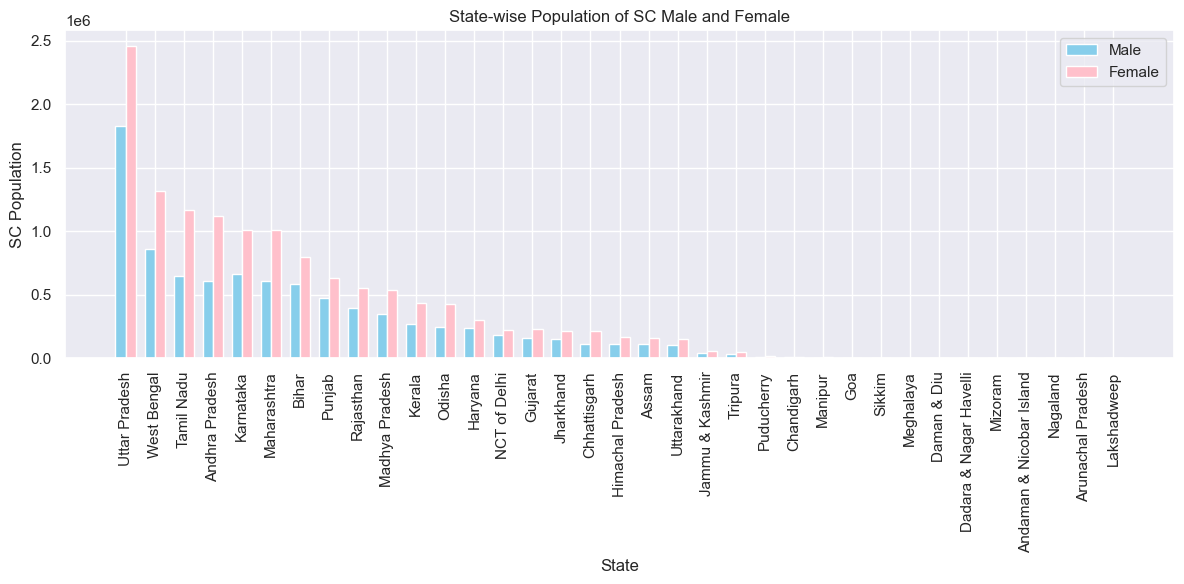

In [38]:
# state-Wise distribution of SC Male and Female
# Sort the data by total SC population in descending order
state_SC_population = state_SC_population.sort_values(by='Total SC Population', ascending=False)

# Extract state names and male/female literate populations
states = state_SC_population['State']
male_SC_population = state_SC_population['M_SC']
female_SC_population = state_SC_population['F_SC']

# Define the bar width and positions
bar_width = 0.35
bar_positions = range(len(states))

# Create the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(bar_positions, male_SC_population, width=bar_width, label='Male', color='skyblue', align='center')
plt.bar([pos + bar_width for pos in bar_positions], female_SC_population, width=bar_width, label='Female', color='pink', align='center')

# Set x-axis labels and ticks
plt.xticks([pos + bar_width / 2 for pos in bar_positions], states, rotation=90)
plt.xlabel('State')
plt.ylabel('SC Population')
plt.title('State-wise Population of SC Male and Female')
plt.legend()

plt.tight_layout()
plt.show()

### 6. Non-working population

In [39]:
import seaborn as sns

C:\Users\Asus\AppData\Local\Temp\ipykernel_21048\4193502647.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('State').sum()[['NON_WORK_M', 'NON_WORK_F']].sort_values(by=['NON_WORK_M','NON_WORK_F'], ascending=False).plot(kind= 'bar', figsize=(12,6))


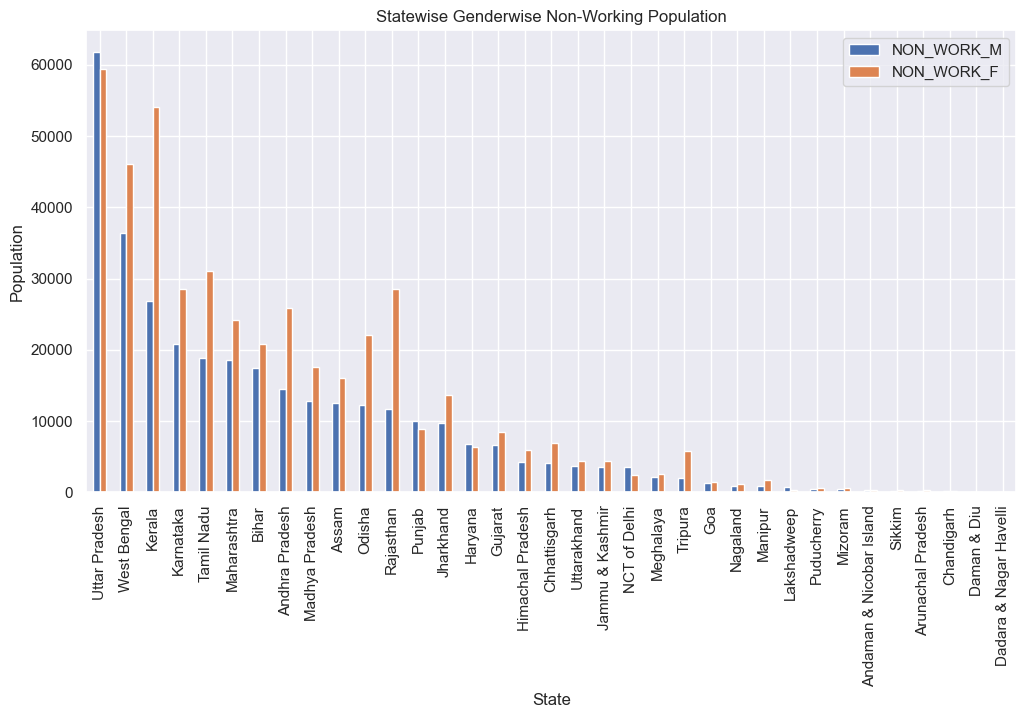

In [46]:
df.groupby('State').sum()[['NON_WORK_M', 'NON_WORK_F']].sort_values(by=['NON_WORK_M','NON_WORK_F'], ascending=False).plot(kind= 'bar', figsize=(12,6))
plt.title('Statewise Genderwise Non-Working Population')
plt.ylabel('Population')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_21048\3487271706.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('State').sum()[['NON_WORK_M', 'NON_WORK_F']].sort_values(by=['NON_WORK_M','NON_WORK_F'], ascending=False).head().plot(kind= 'bar', figsize=(12,6))


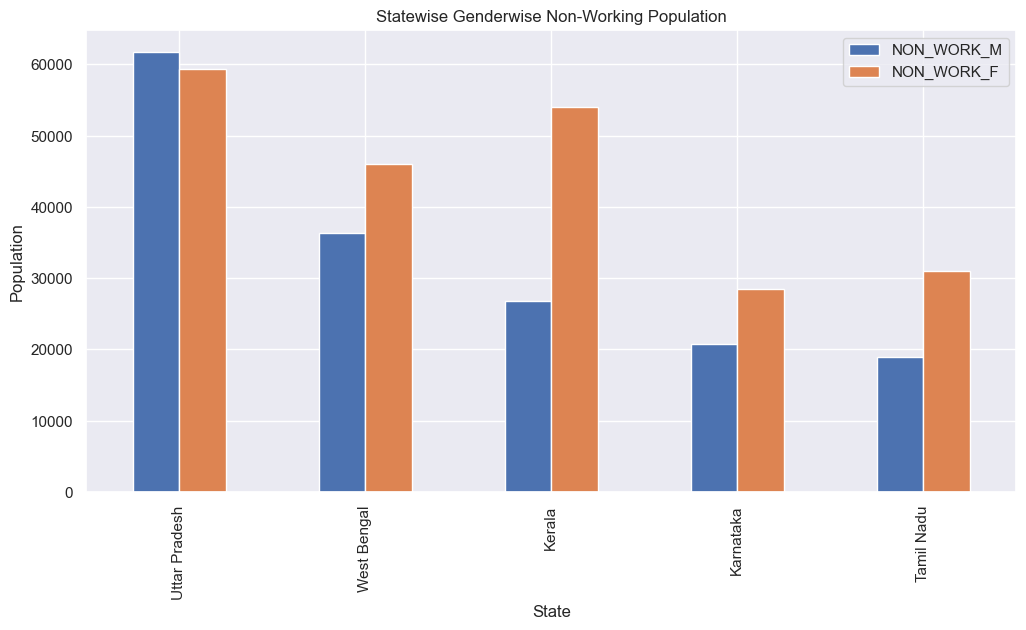

In [47]:
# to see the top 5 states
df.groupby('State').sum()[['NON_WORK_M', 'NON_WORK_F']].sort_values(by=['NON_WORK_M','NON_WORK_F'], ascending=False).head().plot(kind= 'bar', figsize=(12,6))
plt.title('Statewise Genderwise Non-Working Population')
plt.ylabel('Population')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_21048\4075042562.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('State').sum()[['NON_WORK_M', 'NON_WORK_F']].sort_values(by=['NON_WORK_M','NON_WORK_F'], ascending=False).tail().plot(kind= 'bar', figsize=(12,6))


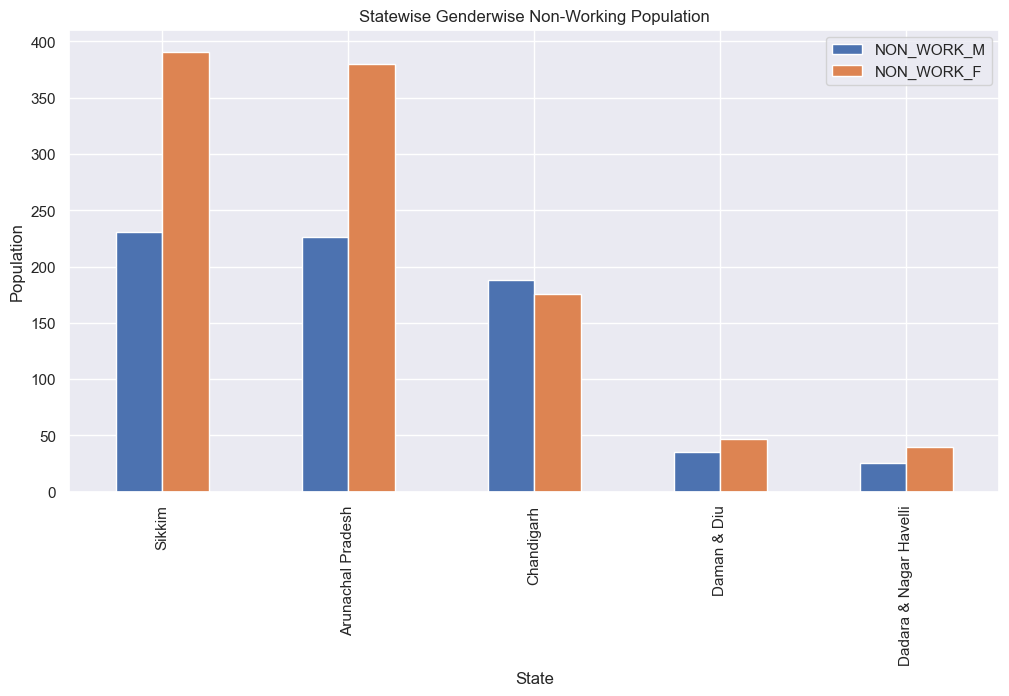

In [48]:
# to see the bottom 5 states
df.groupby('State').sum()[['NON_WORK_M', 'NON_WORK_F']].sort_values(by=['NON_WORK_M','NON_WORK_F'], ascending=False).tail().plot(kind= 'bar', figsize=(12,6))
plt.title('Statewise Genderwise Non-Working Population')
plt.ylabel('Population')
plt.show()

##### Project Done By- Shreya Gupta 

contact- shreyasachin200@gmail.com